In [1]:
!pip install tensorflow

In [1]:
!pip install os

ERROR: Could not find a version that satisfies the requirement os
ERROR: No matching distribution found for os


In [3]:
!pip install matplotlib

In [4]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl


### import 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


### Import Keras Libraries

In [2]:
import keras
from keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

### Read flle

In [99]:
Read_folder = r'C:\Users\benez\Desktop\EX1 - deep learning\chest_xray\chest_xray'
train_Read_folder = os.path.join(Read_folder, 'train')
test_Read_folder = os.path.join(Read_folder, 'test')
val_Read_folder = os.path.join(Read_folder, 'val')
train_p_Read_folder = os.path.join(train_Read_folder, 'PNEUMONIA')
train_n_Read_folder = os.path.join(train_Read_folder, 'NORMAL')
test_p_Read_folder = os.path.join(test_Read_folder, 'PNEUMONIA')
test_n_Read_folder = os.path.join(test_Read_folder, 'NORMAL')

# Extracting all file names 
train_PNEUMONIA_files = os.listdir(train_p_Read_folder)
train_NORMAL_files = os.listdir(train_n_Read_folder)
test_PNEUMONIA_files = os.listdir(test_p_Read_folder)
test_NORMAL_files = os.listdir(test_n_Read_folder)

# test to show hwo mach fiile we have
print ("Accout train normal is :",len(train_NORMAL_files), "and Accout train PNEUMONIA is" , len(train_PNEUMONIA_files))
print ("Accout test normal is :",len(test_NORMAL_files), "and Accout test PNEUMONIA is" , len(test_PNEUMONIA_files))
print("Total images in the training set: ", len(train_PNEUMONIA_files+train_NORMAL_files))
print("Total images in the test set: ", len(test_PNEUMONIA_files+test_NORMAL_files))

Accout train normal is : 1341 and Accout train PNEUMONIA is 3875
Accout test normal is : 234 and Accout test PNEUMONIA is 390
Total images in the training set:  5216
Total images in the test set:  624


### Section number A

In [100]:
BATCH_SIZE=60

# Normalization

train_normalization = ImageDataGenerator(rescale=1./255)
test_normalization = ImageDataGenerator(rescale=1./255)
val_normalization = ImageDataGenerator(rescale=1./255)

# Redefine names
train_directory=train_Read_folder
test_directory=test_Read_folder
val_directory=val_Read_folder



# File deviding to train and val
train_data = tf.keras.utils.image_dataset_from_directory(
    train_directory, seed=3, validation_split=0.1, subset='training')
    
val_data = tf.keras.utils.image_dataset_from_directory(
    train_directory, seed=3, validation_split=0.1, subset='validation')

# resizing and dividing to batches
train_data=train_normalization.flow_from_directory(train_directory, target_size=(224,224),class_mode='binary', batch_size= BATCH_SIZE, color_mode='grayscale')
test_data=test_normalization.flow_from_directory(test_directory, target_size=(224,224),class_mode='binary',batch_size= BATCH_SIZE, color_mode='grayscale')
val_data=val_normalization.flow_from_directory(val_directory, target_size=(224,224),class_mode='binary', batch_size= 2, color_mode='grayscale')

# data
print('The shape of image is : ',test_data.image_shape)
print('train data BATCH SIZE is',len(train_data))
print('test data BATCH SIZE is',len(test_data))
print("the kind of classes model is : ",train_data.class_indices)
print("the number of classes model is : ",train_data.num_classes)

Found 5216 files belonging to 2 classes.
Using 4695 files for training.
Found 5216 files belonging to 2 classes.
Using 521 files for validation.
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
87
shape is :  (224, 224, 1)
val data BATCH SIZE 8
{'NORMAL': 0, 'PNEUMONIA': 1}
2


### Model settings

In [166]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Flatten(input_shape=(224,224,1)))
model.add(layers.Dense(64, activation='relu', name='Dense1'))
model.add(layers.Dense(64, activation='relu', name='Dense2'))
model.add(layers.Dense(32, activation='relu', name='Dense3'))
model.add(layers.Dense(1, activation='sigmoid', name='Dense4'))
model.summary()

Model: "my_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 50176)             0         
                                                                 
 Dense1 (Dense)              (None, 64)                3211328   
                                                                 
 Dense2 (Dense)              (None, 64)                4160      
                                                                 
 Dense3 (Dense)              (None, 32)                2080      
                                                                 
 Dense4 (Dense)              (None, 1)                 33        
                                                                 
Total params: 3,217,601
Trainable params: 3,217,601
Non-trainable params: 0
_________________________________________________________________


In [167]:
model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=1e-6), metrics=['accuracy'])

### Section number B

In [168]:
epochs = 5
model_fit = model.fit(train_data,validation_data = val_data, epochs=epochs, batch_size=BATCH_SIZE )

Epoch 1/5
87/87 [==============================] - 48s 542ms/step - loss: 0.5458 - accuracy: 0.7429 - val_loss: 0.7655 - val_accuracy: 0.5000
Epoch 2/5
87/87 [==============================] - 46s 534ms/step - loss: 0.4736 - accuracy: 0.7502 - val_loss: 0.7472 - val_accuracy: 0.5000
Epoch 3/5
87/87 [==============================] - 47s 537ms/step - loss: 0.4107 - accuracy: 0.7954 - val_loss: 0.6682 - val_accuracy: 0.6250
Epoch 4/5
87/87 [==============================] - 50s 571ms/step - loss: 0.3668 - accuracy: 0.8464 - val_loss: 0.6451 - val_accuracy: 0.6250
Epoch 5/5
87/87 [==============================] - 51s 589ms/step - loss: 0.3373 - accuracy: 0.8744 - val_loss: 0.6197 - val_accuracy: 0.6875


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


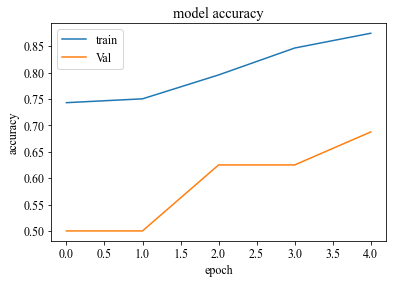

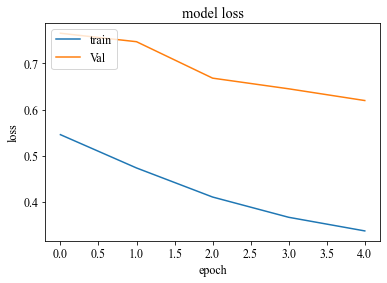

In [169]:
print(model_fit.history.keys())
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

### Section number C

In [106]:
predictions_DNN = model.predict(test_data) 
y_pred_Adam = predictions_DNN > 0.5
y_true_Adam = test_data.classes 

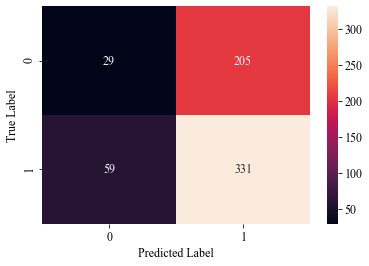

In [107]:
import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_true_Adam, y_pred_Adam)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()



In [108]:
import sklearn.metrics

#Recall = TruePositives / (TruePositives + FalseNegatives)
#precision = TruePositives/(TruePositives+FalsePositives)

recall = sklearn.metrics.recall_score(y_true_Adam, y_pred_Adam, pos_label=1)
print(" The recall of model is:" ,recall)

precision = sklearn.metrics.precision_score(y_true_Adam, y_pred_Adam, pos_label=1)
print("The precision of the model is:" ,precision)

5616
recall 0.8487179487179487
recall 0.12393162393162394
precision 0.6175373134328358
precision 0.32954545454545453
0.609504132231405
0.7564102564102564


### Section number D

#### Defining a convolution model  - (model 2)

In [135]:
tf.keras.backend.clear_session()

In [142]:
num_classes = 1
input_shape = (224, 224, 1)
epochs = 5

model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding = "same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu" ,padding = "same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ]
)

model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dropout_1 (Dropout)         (None, 200704)           

In [145]:
model2.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=1e-3), metrics=['accuracy'])

history_CNN = model2.fit(train_data,validation_data = val_data, epochs = epochs ,batch_size = BATCH_SIZE)

Epoch 1/5
87/87 [==============================] - 148s 2s/step - loss: 0.8304 - accuracy: 0.7941 - val_loss: 1.7545 - val_accuracy: 0.5625
Epoch 2/5
87/87 [==============================] - 156s 2s/step - loss: 0.2192 - accuracy: 0.9036 - val_loss: 1.1729 - val_accuracy: 0.6250
Epoch 3/5
87/87 [==============================] - 154s 2s/step - loss: 0.0955 - accuracy: 0.9655 - val_loss: 0.7577 - val_accuracy: 0.6250
Epoch 4/5
87/87 [==============================] - 153s 2s/step - loss: 0.0887 - accuracy: 0.9668 - val_loss: 0.4890 - val_accuracy: 0.6875
Epoch 5/5
87/87 [==============================] - 152s 2s/step - loss: 0.0824 - accuracy: 0.9695 - val_loss: 0.6054 - val_accuracy: 0.6250


### Section number D - section B

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


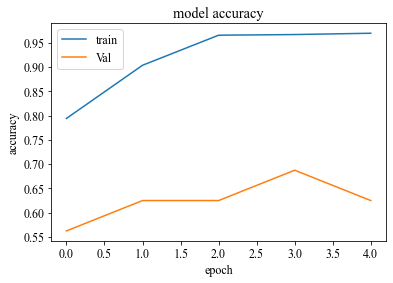

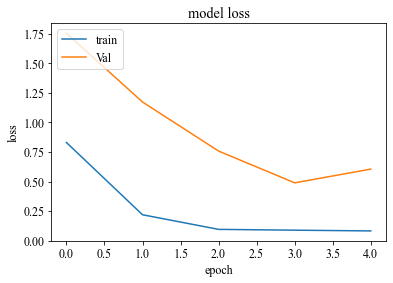

In [147]:
print(history_CNN.history.keys())
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()


# summarize history for loss

plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

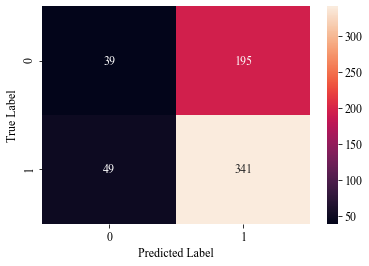

In [148]:
predictions_CNN = model2.predict(test_data) 
y_pred = predictions_CNN > 0.5
y_true = test_data.classes 

import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [149]:
import sklearn.metrics

#Recall = TruePositives / (TruePositives + FalseNegatives)
#precision = TruePositives/(TruePositives+FalsePositives)

recall = sklearn.metrics.recall_score(y_true, y_pred, pos_label=1)
print(" The recall of model is:" ,recall)

precision = sklearn.metrics.precision_score(y_true, y_pred, pos_label=1)
print("The precision of the model is:" ,precision)

 The recall of model is: 0.8743589743589744
The precision of the model is: 0.6361940298507462


In [150]:
IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [151]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(224, 
                                                              224,
                                                              1)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [158]:
num_classes = 2
epochs = 5

model_num_3 = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])

#model_num_3.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=1e-4), metrics=['accuracy'])

model_num_3.compile(optimizer = Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model_num_3_fit=model_num_3.fit(train_data,validation_data = val_data, epochs=epochs, batch_size=BATCH_SIZE)  

Epoch 1/5
87/87 [==============================] - 120s 1s/step - loss: 0.5586 - accuracy: 0.7341 - val_loss: 0.6629 - val_accuracy: 0.6250
Epoch 2/5
87/87 [==============================] - 121s 1s/step - loss: 0.3805 - accuracy: 0.8357 - val_loss: 0.4874 - val_accuracy: 0.7500
Epoch 3/5
87/87 [==============================] - 121s 1s/step - loss: 0.2584 - accuracy: 0.8978 - val_loss: 0.4336 - val_accuracy: 0.8750
Epoch 4/5
87/87 [==============================] - 121s 1s/step - loss: 0.2158 - accuracy: 0.9135 - val_loss: 0.4396 - val_accuracy: 0.8125
Epoch 5/5
87/87 [==============================] - 124s 1s/step - loss: 0.1918 - accuracy: 0.9281 - val_loss: 0.4383 - val_accuracy: 0.8125


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


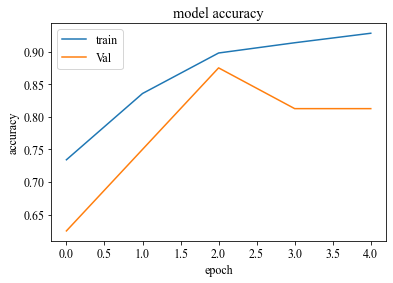

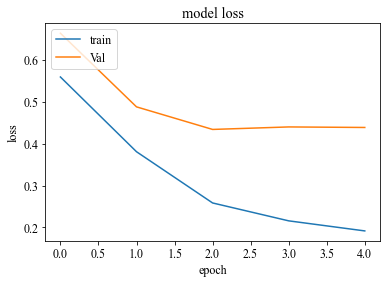

In [159]:
print(model_num_3_fit.history.keys())
plt.plot(model_num_3_fit.history['accuracy'])
plt.plot(model_num_3_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(model_num_3_fit.history['loss'])
plt.plot(model_num_3_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()